# Nothing But NumPy: A 1-layer Binary Classification Neural Network on AND data Using MSE Cost function

Part of the blog ["Nothing but NumPy: Understanding & Creating Binary Classification Neural Networks with Computational Graphs from Scratch"](https://medium.com/@rafayak/nothing-but-numpy-understanding-creating-binary-classification-neural-networks-with-e746423c8d5c)- by [Rafay Khan](https://twitter.com/RafayAK)

In this notebook we'll create a 1-layer neural network (i.e. just an output layer) and train it on AND dataset. We'll set custom weights and see the shortfall of using Mean Squared Error(MSE) Cost function in a Binary Classification setting. 

First, let's import NumPy, our neural net Layers, the Cost functions and helper functions.

_Feel free to look into the helper functions in the utils directory._

In [1]:
import numpy as np
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer
from util.utilities import *
from util.cost_functions import compute_mse_cost, compute_stable_bce_cost, compute_bce_cost, compute_keras_like_bce_cost

# to show all the generated plots inline in the notebook
%matplotlib inline

#### The AND data:

![](imgs/AND_table_with_plot.png)

In [2]:
# This is our AND gate data 

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])


Y = np.array([
    [0],
    [0],
    [0],
    [1]
])

Let's set up training data. Recall, data needs to be in $(features \times \text{number_of_examples})$ shape. So, we need to transpose X and Y.

In [3]:
X_train = X.T
Y_train = Y.T

In [4]:
X_train

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [5]:
Y_train

array([[0, 0, 0, 1]])

This is the neural net architecture we'll use

![](imgs/2in_1_layer_NN.png)

In [6]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable
                   # (weights will now be initailzaed to the same pseudo-random numbers, each time)

# Our network architecture has the shape: 
#                       (input)--> [Linear->Sigmoid] -->(output)  


#------ LAYER-1 ----- define output layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=1, ini_type='plain')
A1 = SigmoidLayer(Z1.Z.shape)

We'll set custom weights to break Mean Squared Error Cost function for gradient descent.

Let's see what's the shape of the weight matrix($W$)

In [7]:
Z1.params['W'].shape

(1, 2)

So, the new weights will also need to be of the same shape

In [8]:
Z1.params['W'] = np.array([[-10, 60]])

In [9]:
Z1.params  # params for a linear layer are weights(W) and biases(b), stored in a dictionary

{'W': array([[-10,  60]]), 'b': array([[ 0.]])}

Now we can start the training loop:

In [10]:
costs = []  # initially empty list, this will store all the costs after a certain number of epochs

# Start training
for epoch in range(number_of_epochs):

    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dA1 = compute_mse_cost(Y=Y_train, Y_hat=A1.A)
    
    # print and store Costs every 100 iterations and of the last iteration.
    if (epoch % 100) == 0 or epoch == number_of_epochs - 1:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)    

    # ------------------------- back-prop ----------------------------        
    A1.backward(dA1)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z1.update_params(learning_rate=learning_rate)

Cost at epoch#0: 0.1562500002576208
Cost at epoch#100: 0.1291735909412119
Cost at epoch#200: 0.12688149709290097
Cost at epoch#300: 0.12617626580805902
Cost at epoch#400: 0.12584559300260187
Cost at epoch#500: 0.12565627734621776
Cost at epoch#600: 0.12553447923266486
Cost at epoch#700: 0.12544988783459748
Cost at epoch#800: 0.12538787511021365
Cost at epoch#900: 0.12534055052085766
Cost at epoch#1000: 0.12530329644095023
Cost at epoch#1100: 0.12527323672250662
Cost at epoch#1200: 0.12524848939298686
Cost at epoch#1300: 0.12522777278273756
Cost at epoch#1400: 0.12521018468712414
Cost at epoch#1500: 0.12519507209383407
Cost at epoch#1600: 0.12518195099769108
Cost at epoch#1700: 0.12517045523023962
Cost at epoch#1800: 0.12516030277453224
Cost at epoch#1900: 0.12515127298278708
Cost at epoch#2000: 0.1251431907979599
Cost at epoch#2100: 0.12513591559406895
Cost at epoch#2200: 0.12512933313404928
Cost at epoch#2300: 0.12512334967604713
Cost at epoch#2400: 0.12511788758823347
Cost at epoch#2

#### We have broken Gradient Descent by exploiting MSE Cost function in a Binary Classifer. No matter the Learning rate, Gradient Descent cannot recover from a bad postion(concave area) on the the Loss/Cost Curve    

Now let's see how well the neural net peforms on the training data after the training as finished

`predict` helper functionin the cell below returns three things:

* `p`: predicted labels (output 1 if predictded output is greater than classification threshold `thresh`)
* `probas`: raw probabilities (how sure the neural net thinks the output is 1, this is just `P_hat`)
* `accuracy`: the number of correct predictions from total predictions



In [11]:
classifcation_thresh = 0.5


predicted_outputs, p_hat, accuracy = predict(X=X_train, Y=Y_train, 
                                             Zs=[Z1], As=[A1], thresh=classifcation_thresh)

print("The predicted outputs of first 5 examples: \n{}".format(predicted_outputs[:,:5]))
print("The predicted prbabilities of first 5 examples:\n {}".format(np.round(p_hat[:, :5], decimals=3)) )
print("\nThe accuracy of the model is: {}%".format(accuracy))

The predicted outputs of first 5 examples: 
[[ 0.  1.  0.  1.]]
The predicted prbabilities of first 5 examples:
 [[ 0.021  1.     0.     1.   ]]

The accuracy of the model is: 75.0%


___The accuracy of model shows it doing ok, but recall from the blog that accuracy alone is a misleading metric. Let's plot the Decision Boundary and make things much more clear___


#### The Learning Curve

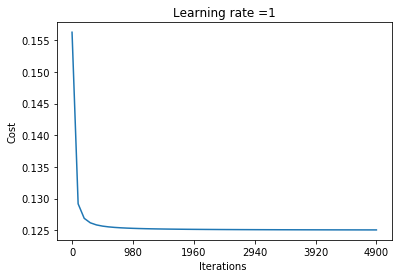

In [12]:
plot_learning_curve(costs, learning_rate, total_epochs=number_of_epochs, save=True)

#### The Decision Boundary

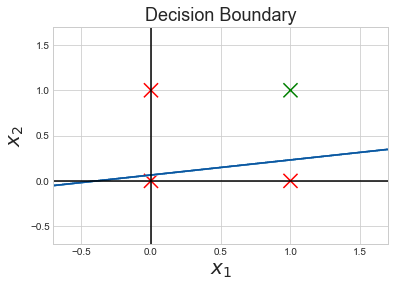

In [13]:
plot_decision_boundary(lambda x: predict_dec(Zs=[Z1], As=[A1], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True, save=True)

#### The Shaded Decision Boundary

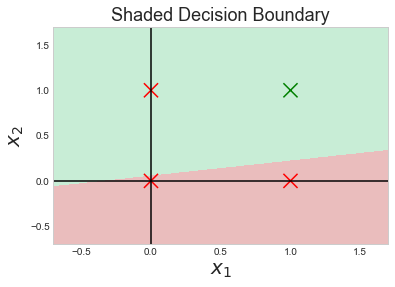

In [14]:
plot_decision_boundary_shaded(lambda x: predict_dec(Zs=[Z1], As=[A1], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True, save=True)

#### The Decision Boundary with Shortest Distances

Play with the `classifcation_thresh` and visualize the effects

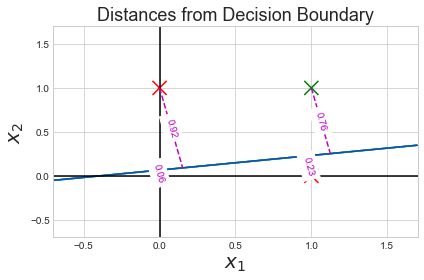

In [15]:
plot_decision_boundary_distances(lambda x: predict_dec(Zs=[Z1], As=[A1], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True)

### Bonus

* Try changing the weights to small values eg. `[0.1, 0.6]`, keeping MSE Cost function and see if it helps(Can you recall the reason why this __works__?).

* Try changing the Cost function to `compute_bce_cost`(unstable) keeping the weights same i.e `[-10, 60]`(Can you recall the reason why this does __not__ work?).

* Try changing the Cost function to either `compute_stable_bce_cost` or `compute_keras_like_bce_cost`(these two require tinkering with the backward and forward flow of computations, look at other notebooks or the blog for help), keeping the weights same i.e `[-10, 60]`(Can you recall the reason why this __works__?).